## Guia da Camada Física
##### O documento tem o objetivo de demostrar o funcionamento da camada física, além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

##### Será instaciada a rede e definida a topologia de Grade

2024-08-12 23:16:04,473: Qubit 0 adicionado à memória do Host 0.
2024-08-12 23:16:04,474: Qubit 0 criado com fidelidade inicial 0.7530878420276216 e adicionado à memória do Host 0.
2024-08-12 23:16:04,474: Qubit 1 adicionado à memória do Host 0.
2024-08-12 23:16:04,475: Qubit 1 criado com fidelidade inicial 0.5502810664672918 e adicionado à memória do Host 0.
2024-08-12 23:16:04,475: Qubit 2 adicionado à memória do Host 0.
2024-08-12 23:16:04,475: Qubit 2 criado com fidelidade inicial 0.9784604844443375 e adicionado à memória do Host 0.
2024-08-12 23:16:04,476: Qubit 3 adicionado à memória do Host 0.
2024-08-12 23:16:04,476: Qubit 3 criado com fidelidade inicial 0.21536283854195826 e adicionado à memória do Host 0.
2024-08-12 23:16:04,476: Qubit 4 adicionado à memória do Host 0.
2024-08-12 23:16:04,477: Qubit 4 criado com fidelidade inicial 0.19899136724815536 e adicionado à memória do Host 0.
2024-08-12 23:16:04,477: Qubit 5 adicionado à memória do Host 0.
2024-08-12 23:16:04,477: Qub

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


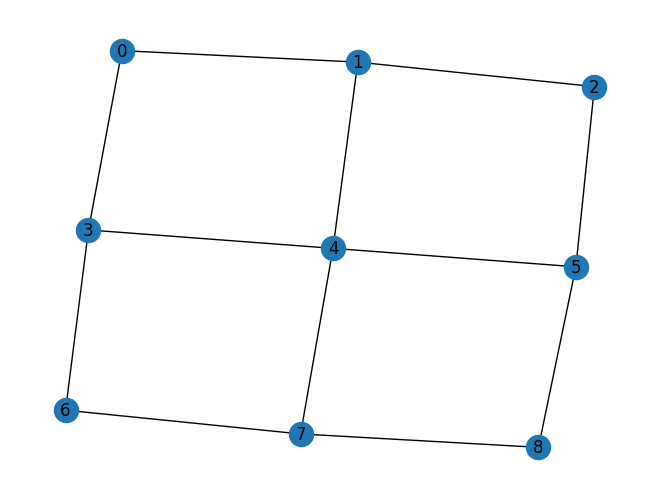

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Selecionando aleatoriamente uma aresta do grafo da rede e deseguinando quem será Alice e Bob.

In [3]:
arestas = list(rede.edges)
aresta_aleatorias = random.sample(arestas, 1)[0]
x,y = aresta_aleatorias

alice = rede.get_host(x)
bob = rede.get_host(y)

##### Adicionando qubits aos hosts.

In [4]:
h1 = Qubit(1)
h2 = Qubit(2)

alice.add_qubit(h1)
bob.add_qubit(h2)

2024-08-12 23:16:05,316: Qubit 1 adicionado à memória do Host 3.
2024-08-12 23:16:05,317: Qubit 2 adicionado à memória do Host 4.


##### Acessando a memória dos Hosts.

In [5]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x00000191A1EBD5E0>, <quantumnet.objects.qubit.Qubit object at 0x00000191A1F45820>, <quantumnet.objects.qubit.Qubit object at 0x00000191A1DFD880>, <quantumnet.objects.qubit.Qubit object at 0x00000191A170E9F0>, <quantumnet.objects.qubit.Qubit object at 0x00000191A170EBD0>, <quantumnet.objects.qubit.Qubit object at 0x00000191A1599EB0>, <quantumnet.objects.qubit.Qubit object at 0x00000191A1CED8E0>, <quantumnet.objects.qubit.Qubit object at 0x00000191A1CEE270>, <quantumnet.objects.qubit.Qubit object at 0x00000191A1FB5C70>, <quantumnet.objects.qubit.Qubit object at 0x00000191A170E570>, <quantumnet.objects.qubit.Qubit object at 0x00000191A1D0B230>]
[<quantumnet.objects.qubit.Qubit object at 0x00000191A1FB62D0>, <quantumnet.objects.qubit.Qubit object at 0x00000191A1FB64B0>, <quantumnet.objects.qubit.Qubit object at 0x00000191A1FB66F0>, <quantumnet.objects.qubit.Qubit object at 0x00000191A1FB67E0>, <quantumnet.objects.qubit.Qubit object at 0x00000191A

##### Obtendo o útimo qubit de um dos hosts

In [6]:
qub1 = alice.get_last_qubit()


##### Medindo a fidelidade entre dois qubits


In [7]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-08-12 23:16:05,343: A fidelidade entre o qubit Qubit 1 with state None e o qubit Qubit 2 with state None é 0.07987108393928462


0.07987108393928462

##### Medindo a fidelidade de um qubit


In [8]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-08-12 23:16:05,351: A fidelidade do qubit Qubit 1 with state None é 0.2431266060584807


0.2431266060584807

##### Criação do protocolo de entrelaçamento entre dois qubits

In [9]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-08-12 23:16:05,364: A fidelidade entre o qubit Qubit 39 with state None e o qubit Qubit 2 with state None é 0.08142807467639664
2024-08-12 23:16:05,365: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

##### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP

In [10]:
rede.physical.echp_on_demand(2,5)

2024-08-12 23:16:05,373: A fidelidade do qubit Qubit 29 with state None é 0.7069527539397144
2024-08-12 23:16:05,373: A fidelidade do qubit Qubit 59 with state None é 0.991991115663641
2024-08-12 23:16:05,374: A probabilidade de sucesso do ECHP é 0.3419489716840865


True

##### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP

In [11]:
rede.physical.echp_on_replay(2,5)

2024-08-12 23:16:05,382: A fidelidade do qubit Qubit 28 with state None é 0.154017211398902
2024-08-12 23:16:05,383: A fidelidade do qubit Qubit 58 with state None é 0.4351282092892086
2024-08-12 23:16:05,383: A probabilidade de sucesso do ECHP falhou.


False

##### Acessando o canal que mostra as probablidades e os pares eprs


In [12]:
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.48759936215720395,
 'prob_replay_epr_create': 0.5209007661668168,
 'eprs': [<quantumnet.objects.epr.Epr at 0x191a1fcfbc0>,
  <quantumnet.objects.epr.Epr at 0x191a1e72c60>]}

##### Acessando o dicionario que contém os pares eprs alocados


In [13]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x191a170e8a0>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x191a1dfedb0>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x191a1fcdfd0>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x191a1be7380>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x191a1fcfbc0>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x191a1f90320>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x191a1fe8ad0>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x191a1fe9400>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x191a1fe98b0>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x191a1e299a0>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x191a1feadb0>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x191a1c93620>,
  <quantumnet.objects.epr.Epr at 0x191a1f93bf0>]}